In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [2]:
"LOGISTIC REGRESSION"
def logReg(xTrain, yTrain):
    # from sklearn document on LogisticRegression
    clf = LogisticRegression(random_state=0).fit(xTrain, yTrain) 
    return clf

#### Original Model from Week 3

This is the original Logistic Regression model from Week 3. It was attained by training and testing on continuous features, adding 'diff' as a feature, and dropping alph1 and alph2.

In [3]:
dir = "../../data/preprocessed/week03_nobin_diff.csv"
df = pd.read_csv(dir)
df.head()

,ustat,alph1,alph2,beta,chi,diff
0,8.408213,2.344511,2.344511,60.0,0,0.0
1,7.006844,2.344511,2.344511,60.0,0,0.0
2,5.255133,2.344511,2.344511,60.0,0,0.0
3,3.503422,2.344511,2.344511,60.0,0,0.0
4,2.102053,2.344511,2.344511,60.0,0,0.0


In [4]:
# separating features and targets
# dropping alph1 and alph2

y = df['chi']
x = df.drop(['alph1', 'alph2'], axis=1)

In [5]:
# Train test split, ratio is 67:33
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.33, random_state=42)

In [6]:
lr = logReg(xTrain, yTrain)

In [7]:
print("Logistic Regression train set score: ", accuracy_score(yTrain, lr.predict(xTrain)))
tn, fp, fn, tp = confusion_matrix(yTrain, lr.predict(xTrain)).ravel()
print("Confusion Matrix Results: ", tn, fp, fn, tp)

Logistic Regression train set score:  0.9925925925925926
Confusion Matrix Results:  247 0 2 21


In [8]:
print("Logistic Regression test set score: ", accuracy_score(yTest, lr.predict(xTest)))
tn, fp, fn, tp = confusion_matrix(yTest, lr.predict(xTest)).ravel()
print("Confusion Matrix Results: ", tn, fp, fn, tp)

Logistic Regression test set score:  1.0
Confusion Matrix Results:  119 0 0 15


#### Creating artificial data

A problem with machine learning, especially when you are starting out and want to learn about the algorithms, is that it is often difficult to get suitable test data. 

Artificial data was generated by taking the original data and adding noise. The mean and standard deviation of the normal distribution is 0 and 0.1, respectively. Noise was created with the same dimension as the original dataset.

In [9]:
mu, sigma = 0, 0.1

In [10]:
large_chi = np.genfromtxt("../../data/Large_chi.dat")
large_chi = np.delete(large_chi, 0, 0)
large_chi_df = pd.DataFrame(large_chi, columns = ['ustat','alph1','alph2', 'beta', 'chi'])

In [11]:
large_chi_df.shape

(38, 5)

In [12]:
noise = np.random.normal(mu, sigma, [38,5])
large_signal = large_chi_df + noise
large_signal.head()

,ustat,alph1,alph2,beta,chi
0,10.500094,2.317981,2.365585,59.936499,3.288619
1,15.786673,1.392529,1.348227,60.104467,15.910765
2,9.174221,1.342684,1.521243,89.362480,10.966268
3,7.454574,1.629419,1.573170,89.200690,3.846061
4,12.933056,2.324984,1.963028,46.585871,5.653814


In [13]:
small_chi = np.genfromtxt("../../data/Small_chi.dat")
small_chi = np.delete(small_chi, 0, 0)
small_chi_df = pd.DataFrame(small_chi, columns = ['ustat','alph1','alph2', 'beta', 'chi'])

In [14]:
small_chi_df.shape

(366, 5)

In [15]:
noise = np.random.normal(mu, sigma, [366,5])
small_signal = small_chi_df + noise
small_signal.head()

,ustat,alph1,alph2,beta,chi
0,8.245769,2.334213,2.229000,59.987766,1.027867
1,6.937854,2.419623,2.442753,60.025324,0.843826
2,5.304276,2.338836,2.413715,59.995711,0.882634
3,3.392019,2.296831,2.335242,60.023798,0.943002
4,2.105861,2.314090,2.318320,60.053515,0.826086


Text(0, 0.5, 'chi')

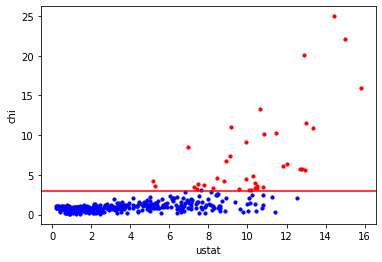

In [16]:
plt.scatter(small_signal['ustat'], small_signal['chi'], s = 10, c = 'blue')
plt.scatter(large_signal['ustat'], large_signal['chi'], s = 10, c = 'red')
plt.axhline(y=3, color='r', linestyle='-')
plt.xlabel('ustat')
plt.ylabel('chi')

We see the artificial (noisy) data resembles the original dataset.

#### Idea 1

Since our current LR model does very well (perfect testing accuracy and perfect AUC), we can use the artificial data as testing data to see how it performs. The results will reveal to us if the model is suffering from overfitting.

In [17]:
small_samp = small_signal.sample(n = 76)

In [18]:
frames = [small_samp, large_signal]
new_test = pd.concat(frames, ignore_index=True)
new_test.head()

,ustat,alph1,alph2,beta,chi
0,2.887459,1.401432,6.308135,46.536918,0.597271
1,2.471130,1.810698,1.854018,88.996825,0.863451
2,2.467207,0.968492,64.286617,46.318873,0.125122
3,3.539068,2.136895,2.016186,13.611341,0.336987
4,0.280683,1.317386,87.044983,47.707130,1.030110


In [19]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ustat   114 non-null    float64
 1   alph1   114 non-null    float64
 2   alph2   114 non-null    float64
 3   beta    114 non-null    float64
 4   chi     114 non-null    float64
dtypes: float64(5)
memory usage: 4.6 KB


Since there are only 38 artificial large chi instances, I included all of them in the testing data. I added 76 randomly selected artificial small chi instances as well (2:1 ratio). There is a total of 114 instances.

In [20]:
# Convert Chi to binary variable

# small chi = 0
# large chi = 1
labels = []
for i in new_test['chi']:
    if i < 3:
        labels.append(0)
    else:
        labels.append(1)
        
new_test['chi'] = labels

In [21]:
# diff = |alph1 - alph2|
diff = []

for i in range(len(new_test['alph1'])):
    diff.append(abs(new_test['alph1'][i] - new_test['alph2'][i]))
    
new_test['diff'] = diff

In [22]:
# separating features and targets
# dropping alph1 and alph2

yTest = new_test['chi']
xTest = new_test.drop(['alph1', 'alph2'], axis=1)

In [23]:
print("Logistic Regression test set score: ", accuracy_score(yTest, lr.predict(xTest)))
tn, fp, fn, tp = confusion_matrix(yTest, lr.predict(xTest)).ravel()
print("Confusion Matrix Results: ", tn, fp, fn, tp)

Logistic Regression test set score:  0.9824561403508771
Confusion Matrix Results:  76 0 2 36


C:\Users\jeffr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Logistic Regression')

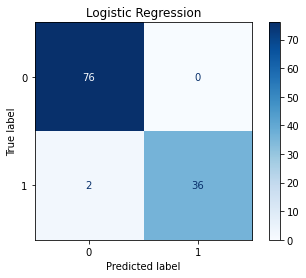

In [24]:
disp = plot_confusion_matrix(lr, xTest, yTest, cmap=plt.cm.Blues)
disp.ax_.set_title("Logistic Regression")

C:\Users\jeffr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


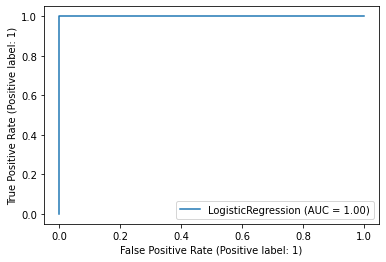

In [25]:
metrics.plot_roc_curve(lr, xTest, yTest)

#### Idea 2

We can add the artificial data into the training data to regularize the model. Adding noise during training can make the training process more robust and reduce generalization error (overfitting).

In [26]:
dir = "../../data/preprocessed/week03_nobin_diff.csv"
df = pd.read_csv(dir)
df.head()

,ustat,alph1,alph2,beta,chi,diff
0,8.408213,2.344511,2.344511,60.0,0,0.0
1,7.006844,2.344511,2.344511,60.0,0,0.0
2,5.255133,2.344511,2.344511,60.0,0,0.0
3,3.503422,2.344511,2.344511,60.0,0,0.0
4,2.102053,2.344511,2.344511,60.0,0,0.0


In [27]:
# separating features and targets
# dropping alph1 and alph2

y = df['chi']
x = df.drop(['alph1', 'alph2'], axis=1)

In [28]:
# Train test split, ratio is 67:33
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.33, random_state=42)

In [29]:
# concatenate the dfs
small_samp = small_signal.sample(n = 10)
large_samp = large_signal.sample(n = 10)

frames = [small_samp, large_samp]
result = pd.concat(frames, ignore_index=True)
result.head()

,ustat,alph1,alph2,beta,chi
0,2.335560,1.755595,1.726410,84.520873,0.275047
1,0.280683,1.317386,87.044983,47.707130,1.030110
2,8.130737,1.963877,2.017599,13.783262,1.238889
3,8.531414,2.190770,2.150383,60.121071,0.814090
4,3.693672,1.757549,1.547031,45.750279,1.230918


In [30]:
# Convert Chi to binary variable

# small chi = 0
# large chi = 1
labels = []
for i in result['chi']:
    if i < 3:
        labels.append(0)
    else:
        labels.append(1)
        
result['chi'] = labels

In [31]:
# diff = |alph1 - alph2|
diff = []

for i in range(len(result['alph1'])):
    diff.append(abs(result['alph1'][i] - result['alph2'][i]))
    
result['diff'] = diff

In [32]:
xTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 277 to 102
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ustat   270 non-null    float64
 1   beta    270 non-null    float64
 2   chi     270 non-null    int64  
 3   diff    270 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 10.5 KB


In [33]:
# concatenate the dfs
frames = [yTrain, result['chi']]
yTrain = pd.concat(frames, ignore_index=True)

frames = [xTrain, result.drop(['alph1', 'alph2'], axis=1)]
xTrain = pd.concat(frames, ignore_index=True)

In [34]:
xTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ustat   290 non-null    float64
 1   beta    290 non-null    float64
 2   chi     290 non-null    int64  
 3   diff    290 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 9.2 KB


In [35]:
lr = logReg(xTrain, yTrain)

In [36]:
print("Logistic Regression train set score: ", accuracy_score(yTrain, lr.predict(xTrain)))
tn, fp, fn, tp = confusion_matrix(yTrain, lr.predict(xTrain)).ravel()
print("Confusion Matrix Results: ", tn, fp, fn, tp)

Logistic Regression train set score:  0.993103448275862
Confusion Matrix Results:  257 0 2 31


In [37]:
print("Logistic Regression test set score: ", accuracy_score(yTest, lr.predict(xTest)))
tn, fp, fn, tp = confusion_matrix(yTest, lr.predict(xTest)).ravel()
print("Confusion Matrix Results: ", tn, fp, fn, tp)

Logistic Regression test set score:  1.0
Confusion Matrix Results:  119 0 0 15


C:\Users\jeffr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Logistic Regression')

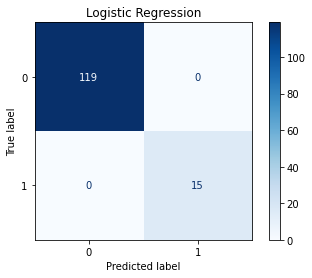

In [38]:
disp = plot_confusion_matrix(lr, xTest, yTest, cmap=plt.cm.Blues)
disp.ax_.set_title("Logistic Regression")

C:\Users\jeffr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


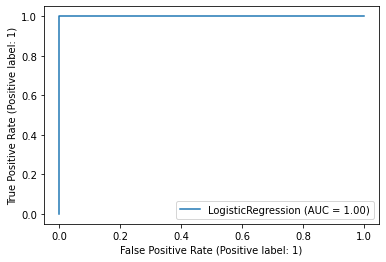

In [39]:
metrics.plot_roc_curve(lr, xTest, yTest)